In [223]:
import re
def functionA():
    print("question a:\n")
    CPR = '''1234567890'''
    # Create regular expression
    pattern = re.compile(r"^(\d{2})(\d{2})(\d{2})(\d{4})")
    for data_line in CPR.split('\n'):
        Match = pattern.match(data_line)
        if Match:
            print(Match.groups())
            print("\n")

def functionB():
    print("question b\n")
    CPR = '''0123456789'''
    # Create regular expression
    pattern = re.compile(r"^(\d{2})(\d{2})(\d{2})(\d{4})")
    for data_line in CPR.split('\n'):
        Match = pattern.match(data_line)
        if Match:
            if 0<=int(Match.group(4))<=3999: 
                return 1900
            elif (4000<=int(Match.group(4))<=4999 or 9000<=int(Match.group(4))<=9999): 
                if 0<=int(Match.group(3))<=36:
                    return 2000
                elif 37<=int(Match.group(3))<=99:
                    return 1900
            elif 5000<=int(Match.group(4))<=8999:
                if 0<=int(Match.group(3))<=57:
                    return 2000
                elif 58<=int(Match.group(3))<=99:
                    return 1800
functionA()
functionB()

question a:

('12', '34', '56', '7890')


question b



2000

In [227]:
import re
import pandas as pd
import csv
import numpy
import requests

def clean_text():
    #Read the csv file
    df = pd.read_csv("C:/Users/ibler/OneDrive/Skrivebord/Data-science/Kode/Assignments/news_sample.csv")
    ndf = ""
    for i in range (len(df.content)):
        ndf = ndf + df["content"][i]
        
    #Make all words lowercase
    ndf = ndf.lower()
    
    #Replace whitespaces
    ndf = re.sub(pattern = "\r{2,}",repl = "\r",string = ndf)
    
    #Replace tabs
    ndf = re.sub(pattern = "\t{2,}",repl = "\t",string = ndf)

    #Replace newlines
    ndf = re.sub(pattern = "\n{2,}",repl = "\n",string = ndf)

    #Replace numbers
    
    ndf = re.sub(pattern = "[0-9]+,?\.?[0-9]*",repl = "<NUM>",string = ndf)
    
    #Replace Dates
    ndf = re.sub(pattern = "<NUM>*th",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<NUM>*rd",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "january",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "february",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "march",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "april",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "may",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "june",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "july",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "august",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "september",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "october",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "november",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "december",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<DATE>+\r*<NUM>+",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<NUM>+\r*<DATE>+",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<DATE>{2,}",repl = "<DATE>",string = ndf)

    #Replace Emails
    ndf = re.sub(pattern = "\b[\<>A-Za-z._%+-]+@[A-Za-z<>.-]+\.[A-Za-z]{2,}\b",repl = "<EMAIL>",string = ndf)

    #Replace URLs
    ndf = re.sub(pattern = "\w+:\/\/.*?(?=\s)",repl = "<URL>",string = ndf)
    ndf = re.sub(pattern = "www\..*?(?=\s)",repl = "<URL>",string = ndf)
    
    return ndf    
clean_text()

'sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the positive power of doing good for others. the simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve. the pastor at grand lake united methodist church in celina, ohio gave an emotional sermon about the importance of understanding the message of jesus.\nfor many religious people the message of jesus is to help others before yourself, to make sure the people who are suffering get the help they need to enjoy life a little bit. the sermon was really about generosity and what that can look like in our lives. jesus lived a long time ago and he acted generously in the fashion of his time – but what would a generous act look like in our times? 

clean text start
Amount of unique words before preprocessing:
4740 

Amount of unique words after preprocessing:
5840


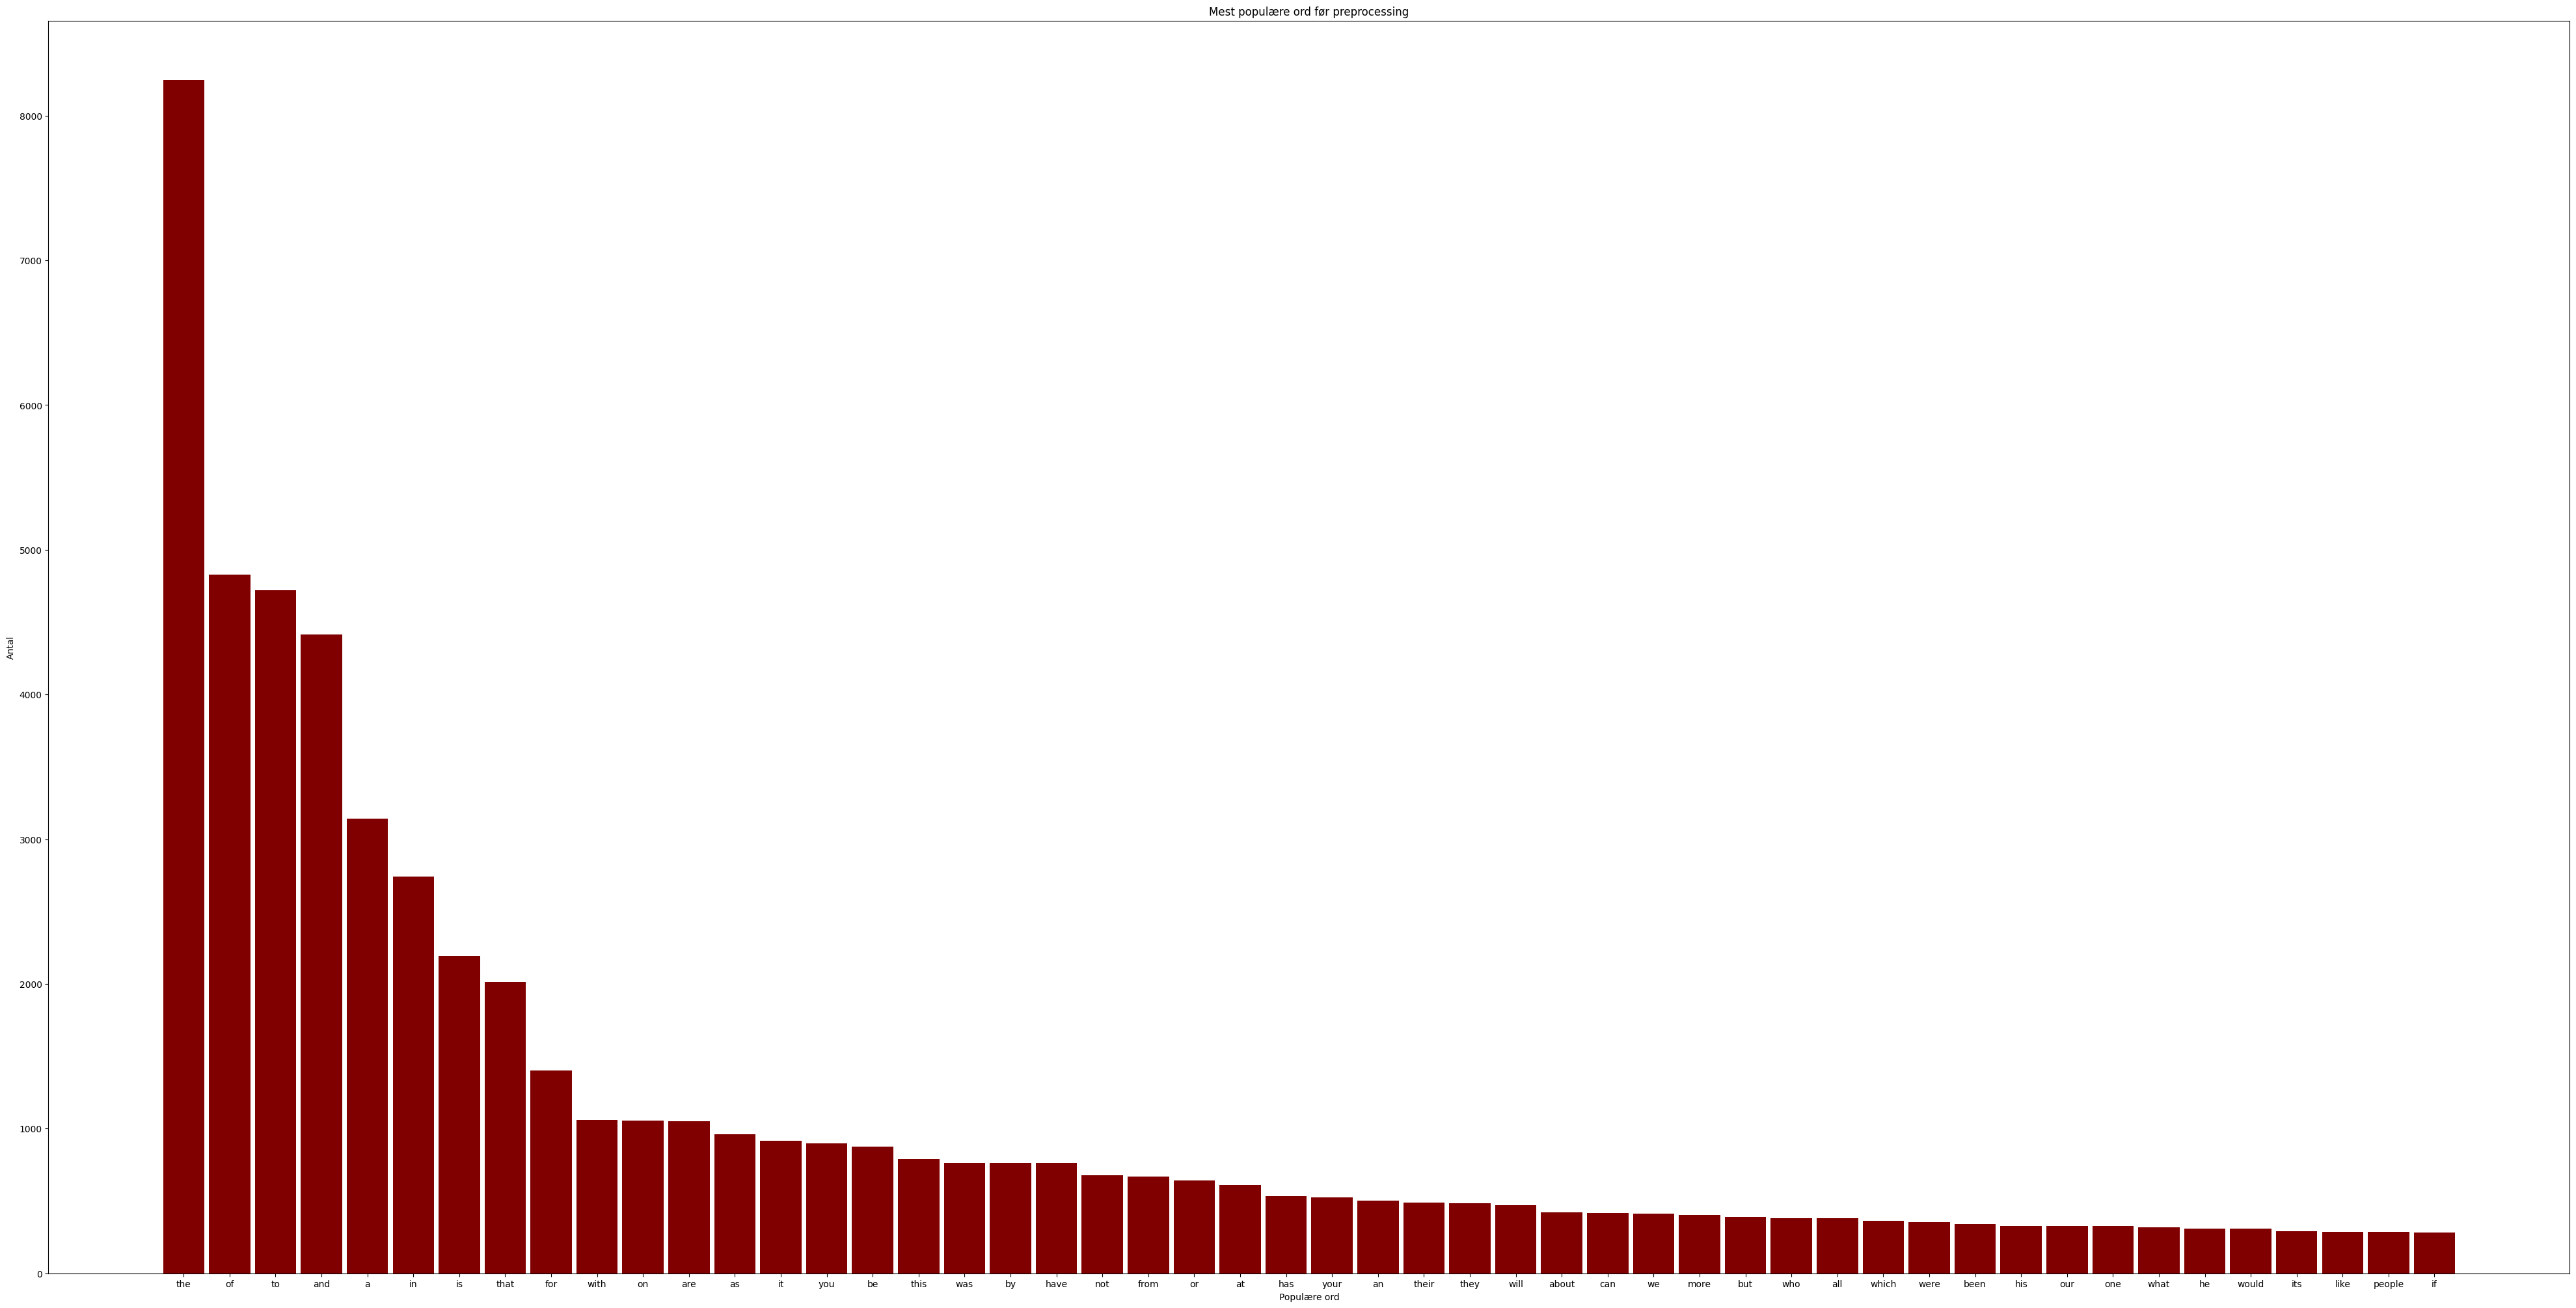

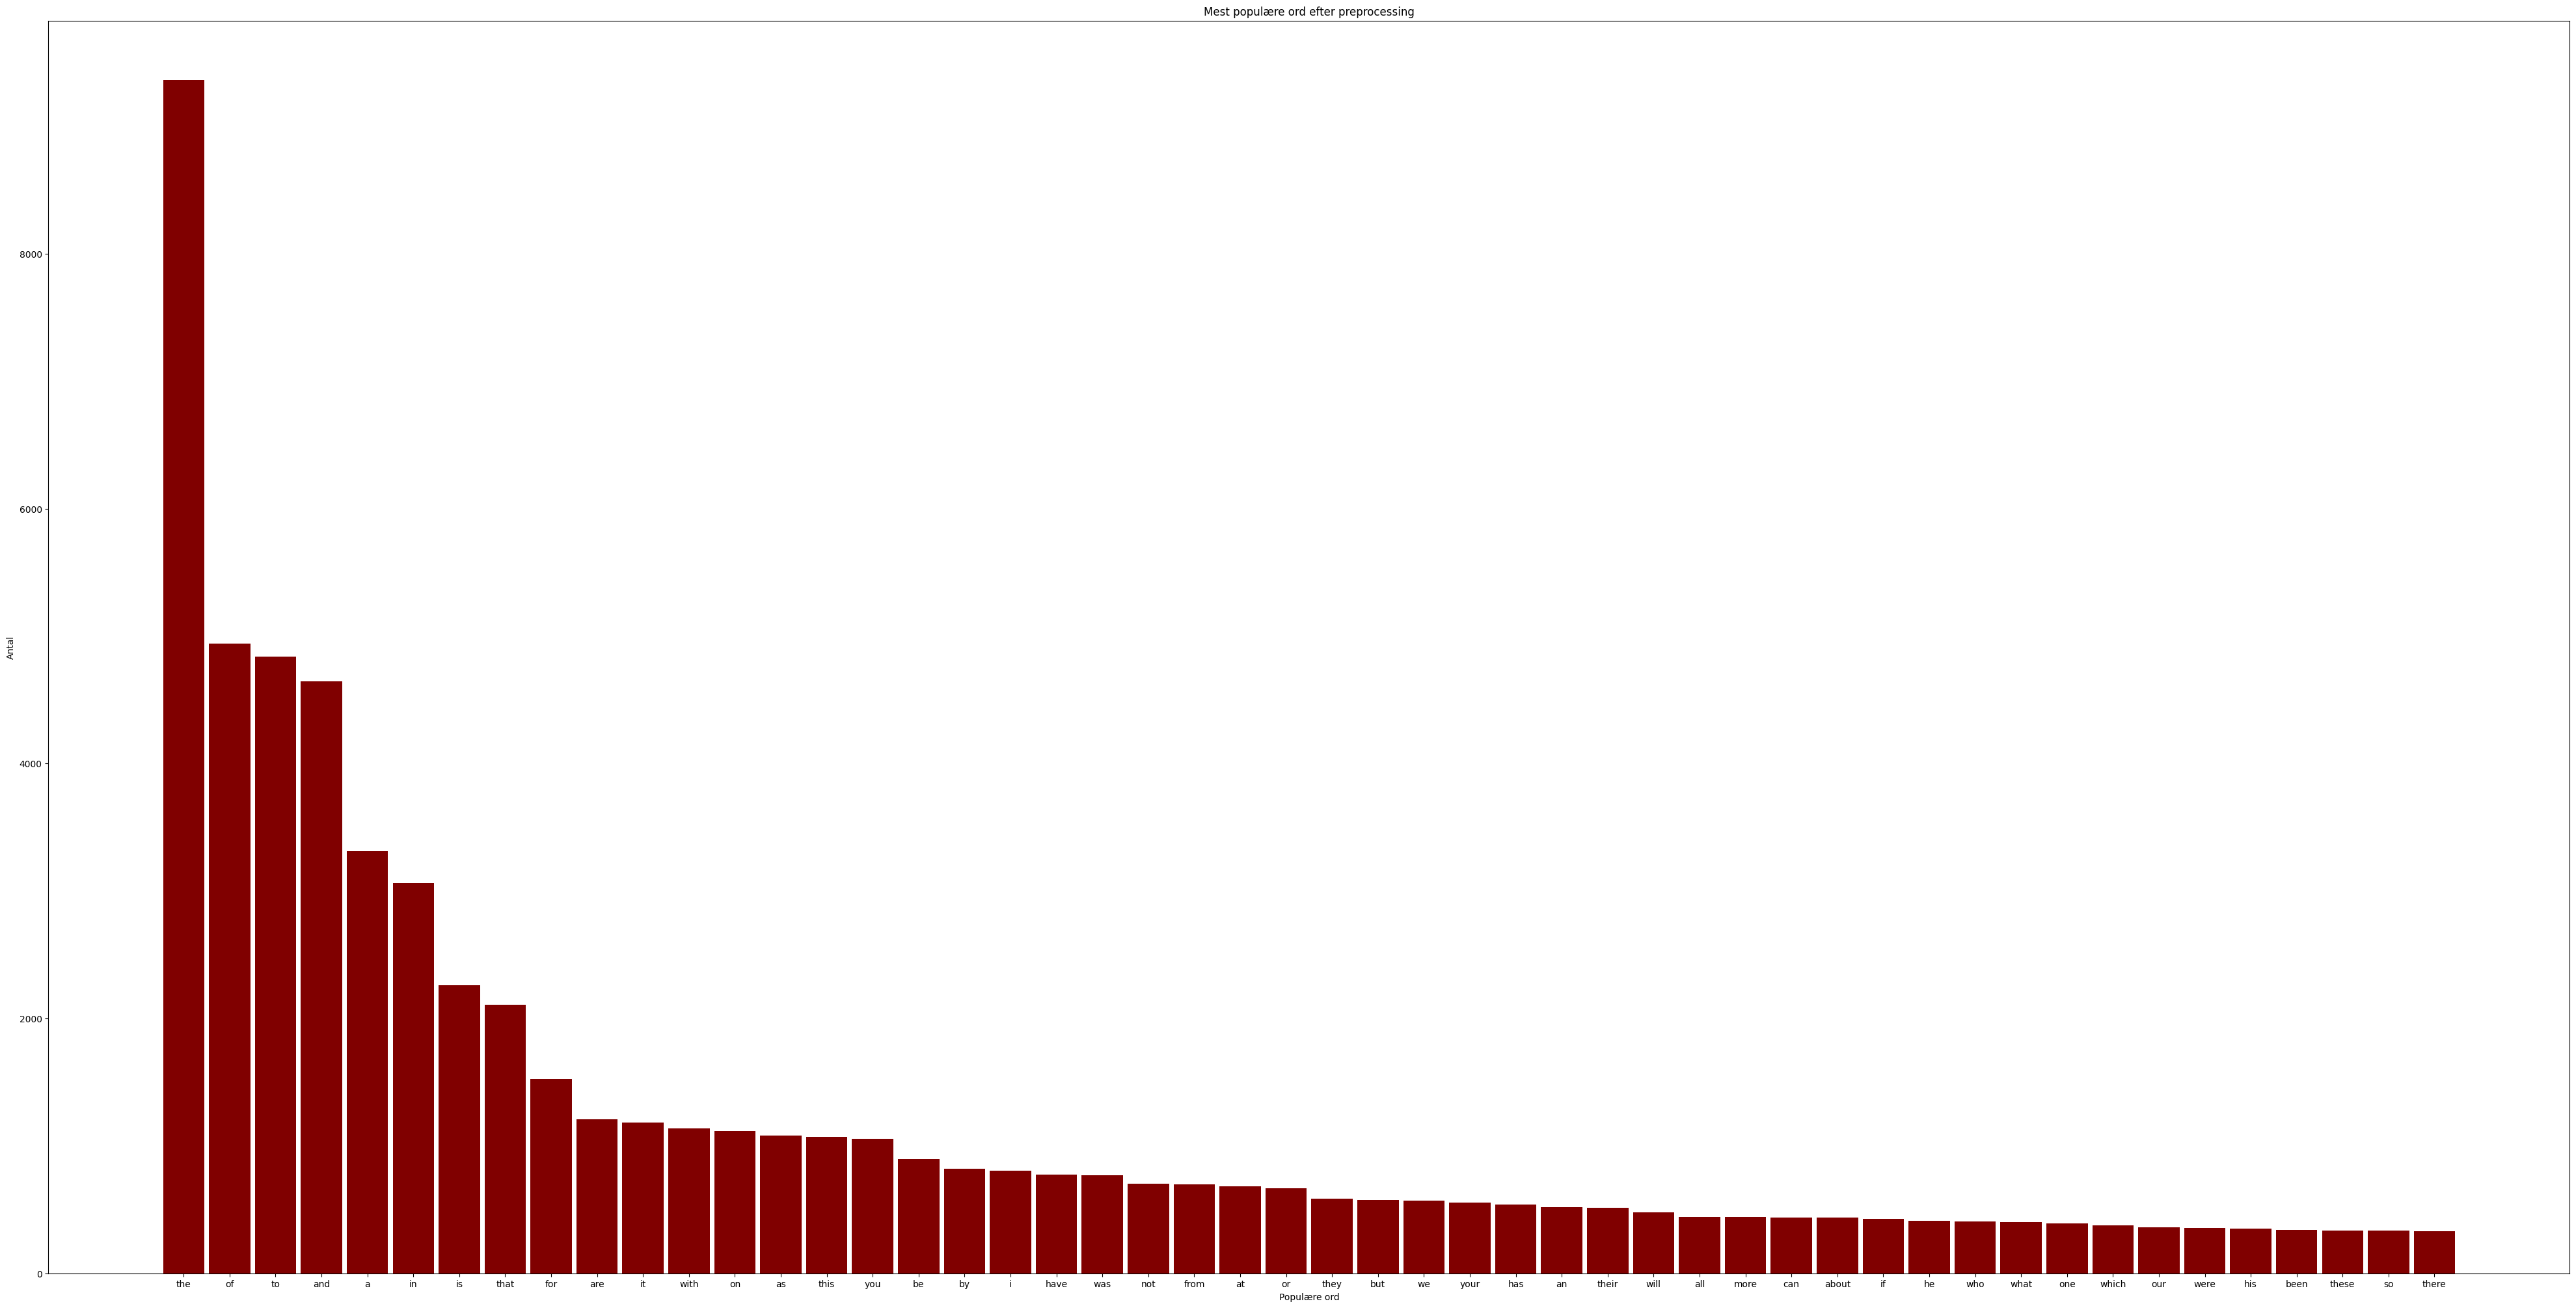

['the', 'power', 'of', 'christmas', 'will', 'make', 'you', 'do', 'wild', 'and', 'wonderful', 'you', 'do', 'not', 'need', 'to', 'believe', 'in', 'the', 'holy', 'trinity', 'to', 'believe', 'in', 'the', 'positive', 'power', 'of', 'doing', 'good', 'for', 'the', 'simple', 'act', 'of', 'giving', 'without', 'receiving', 'is', 'lost', 'on', 'many', 'of', 'us', 'these', 'as', 'worries', 'about', 'money', 'and', 'success', 'hold', 'us', 'back', 'from', 'giving', 'to', 'others', 'who', 'are', 'in', 'one', 'congregation', 'in', 'ohio', 'was', 'moved', 'to', 'action', 'by', 'the', 'power', 'of', 'a', 'sermon', 'given', 'at', 'their', 'church', 'on', 'christmas', 'the', 'pastor', 'at', 'grand', 'lake', 'united', 'methodist', 'church', 'in', 'ohio', 'gave', 'an', 'emotional', 'sermon', 'about', 'the', 'importance', 'of', 'understanding', 'the', 'message', 'of', 'for', 'many', 'religious', 'people', 'the', 'message', 'of', 'jesus', 'is', 'to', 'help', 'others', 'before', 'to', 'make', 'sure', 'the', '

In [2]:
import re
import pandas as pd
import csv
import numpy
import matplotlib.pyplot as plt 

from collections import Counter

def countUniqueWords(ndf):
    i = 1
    uw = 0                # Unique word counter
    border = len(ndf)
    ranglisten = Counter(ndf).most_common(len(ndf))
    while i < border:
        if ranglisten[-i][1] == 1:
            uw = uw + 1
            i = i + 1
        else:
            border = i
            return uw

#Returns list of most popular words corresponding to amount 'Range'
def val(ndf, Range):
    ret = []
    for i in range (Range):
        ret.append(Counter(ndf).most_common(Range)[i][1])
    return ret
    
#Returns list of names of most popular words corresponding to amount 'Range'
def key(ndf, Range):
    ret = []
    for i in range (Range):
        ret.append(Counter(ndf).most_common(Range)[i][0]) 
    return ret

def clean_text():
    print("clean text start")
    
    #Read the csv file
    df = pd.read_csv("C:/Users/ibler/OneDrive/Skrivebord/Data-science/Kode/Assignments/news_sample.csv")
    "DirtyNewDataFrame"
    ddf = ""
    for i in range (len(df.content)):
        ddf = ddf + df["content"][i]
        
    #we clean the dataframe so now its name is just NewDataFrame
    ndf = ddf
    
    #Make all words lowercase
    ndf = ndf.lower()
    
    #Replace whitespaces
    ndf = re.sub(pattern = "\r{2,}",repl = "\r",string = ndf)
    
    #Replace tabs
    ndf = re.sub(pattern = "\t{2,}",repl = "\t",string = ndf)

    #Replace newlines
    ndf = re.sub(pattern = "\n{2,}",repl = "\n",string = ndf)

    #Replace numbers
    
    ndf = re.sub(pattern = "[0-9]+,?\.?[0-9]*",repl = "<NUM>",string = ndf)
    
    #Replace Dates
    ndf = re.sub(pattern = "<NUM>*th",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<NUM>*rd",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "january",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "february",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "march",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "april",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "may",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "june",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "july",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "august",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "september",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "october",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "november",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "december",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<DATE>+\r*<NUM>+",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<NUM>+\r*<DATE>+",repl = "<DATE>",string = ndf)
    ndf = re.sub(pattern = "<DATE>{2,}",repl = "<DATE>",string = ndf)

    
    #Replace Emails
    ndf = re.sub(pattern = "\b[\<>A-Za-z._%+-]+@[A-Za-z<>.-]+\.[A-Za-z]{2,}\b",repl = "<EMAIL>",string = ndf)

    #Replace URLs
    ndf = re.sub(pattern = "\w+:\/\/.*?(?=\s)",repl = "<URL>",string = ndf)
    ndf = re.sub(pattern = "www\..*?(?=\s)",repl = "<URL>",string = ndf)

    #Find all words and count amount of unique words
    #Start by sorting everything but natural language words out of the New Data Frame and Dirty DataFrame and turn it into a list we can iterate over
    ndf = re.findall("(?<=\s)[a-z]+(?=\s)",ndf)
    ddf = re.findall("(?<=\s)[a-z]+(?=\s)",ddf)

    print("Amount of unique words before preprocessing:")
    uw = countUniqueWords(ddf)
    print(uw,"\n")
    
    print("Amount of unique words after preprocessing:")
    uw = countUniqueWords(ndf)
    print(uw)

    # print("\n50 most used words before cleaning:")
    # print(Counter(ddf).most_common(50))
    
    # print("\n50 most used words after cleaning:")
    # print(Counter(ndf).most_common(50))
    
    #Plot the 50 most used words
    plot(ddf,50,"Populære ord", "Antal", "Mest populære ord før preprocessing")
    plot(ndf,50,"Populære ord", "Antal", "Mest populære ord efter preprocessing")

    
    
    return
    
#plots most popular words
def plot(ndf,amount,xlabel,ylabel,title):
    keys = key(ndf,amount)
    values = val(ndf,amount)
    fig = plt.figure(figsize = (amount, amount/2))
    plt.bar(keys, values, color ='maroon', width = 0.9)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
# Initiate the script
clean_text()

In [218]:
from cleantext import clean
import re
import pandas as pd
import csv
import numpy
part
#Read the csv file
df = pd.read_csv("C:/Users/ibler/OneDrive/Skrivebord/Data-science/Kode/Assignments/news_sample.csv")
ndf = ""
for i in range (len(df.content)):
    ndf = ndf + df["content"][i]
clean(ndf,
fix_unicode=True,               # fix various unicode errors
to_ascii=True,                  # transliterate to closest ASCII representation
lower=True,                     # lowercase text
no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
no_urls=True,                  # replace all URLs with a special token
no_emails=True,                # replace all email addresses with a special token
no_phone_numbers=True,         # replace all phone numbers with a special token
no_numbers=True,               # replace all numbers with a special token
no_digits=True,                # replace all digits with a special token
no_currency_symbols=False,      # replace all currency symbols with a special token
no_punct=False,                 # remove punctuations
replace_with_punct="",          # instead of removing punctuations you may replace them
replace_with_url="<URL>",
replace_with_email="<EMAIL>",
replace_with_phone_number="<PHONE>",
replace_with_number="<NUMBER>",
replace_with_digit="0",
replace_with_currency_symbol="<CUR>",
lang="en"                       # set to 'de' for German special handling
)

    
    

'sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the positive power of doing good for others. the simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve. the pastor at grand lake united methodist church in celina, ohio gave an emotional sermon about the importance of understanding the message of jesus.\nfor many religious people the message of jesus is to help others before yourself, to make sure the people who are suffering get the help they need to enjoy life a little bit. the sermon was really about generosity and what that can look like in our lives. jesus lived a long time ago and he acted generously in the fashion of his time but what would a generous act look like in our times? th